In [1]:

import pandas as pd
import seaborn as sns

from iFEMG_feature import *

'''
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet  # 批量导入要实现的回归算法
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor  # 集成算法
from sklearn.model_selection import cross_val_score  # 交叉检验
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score  # 批量导入指标算法
'''

'\nfrom sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet  # 批量导入要实现的回归算法\nfrom sklearn.ensemble.gradient_boosting import GradientBoostingRegressor  # 集成算法\nfrom sklearn.model_selection import cross_val_score  # 交叉检验\nfrom sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score  # 批量导入指标算法\n'

In [15]:
# 读取数据，包含三个肌肉信号通道的特征值
data_df = pd.read_csv(r"E:\Data\20230509积水潭两患者\s1\huance\w1s1_affected_tricps_br.csv", index_col=0, header=[0,1])
data_df.head

<bound method NDFrame.head of       agonist_ch1                                                     \
     subject_name height(cm) weight(kg) gender age    sensor_channel   
0   w1s1_affected        183         75      1  35  tricps_br_medial   
1   w1s1_affected        183         75      1  35  tricps_br_medial   
2   w1s1_affected        183         75      1  35  tricps_br_medial   
3   w1s1_affected        183         75      1  35  tricps_br_medial   
4   w1s1_affected        183         75      1  35  tricps_br_medial   
5   w1s1_affected        183         75      1  35  tricps_br_medial   
6   w1s1_affected        183         75      1  35  tricps_br_medial   
7   w1s1_affected        183         75      1  35  tricps_br_medial   
8   w1s1_affected        183         75      1  35  tricps_br_medial   
9   w1s1_affected        183         75      1  35  tricps_br_medial   
10  w1s1_affected        183         75      1  35  tricps_br_medial   
11  w1s1_affected        183      

In [16]:
df2show = data_df['agonist_ch1']
df2show.head

<bound method NDFrame.head of      subject_name  height(cm)  weight(kg)  gender  age    sensor_channel  \
0   w1s1_affected         183          75       1   35  tricps_br_medial   
1   w1s1_affected         183          75       1   35  tricps_br_medial   
2   w1s1_affected         183          75       1   35  tricps_br_medial   
3   w1s1_affected         183          75       1   35  tricps_br_medial   
4   w1s1_affected         183          75       1   35  tricps_br_medial   
5   w1s1_affected         183          75       1   35  tricps_br_medial   
6   w1s1_affected         183          75       1   35  tricps_br_medial   
7   w1s1_affected         183          75       1   35  tricps_br_medial   
8   w1s1_affected         183          75       1   35  tricps_br_medial   
9   w1s1_affected         183          75       1   35  tricps_br_medial   
10  w1s1_affected         183          75       1   35  tricps_br_medial   
11  w1s1_affected         183          75       1   35  tr

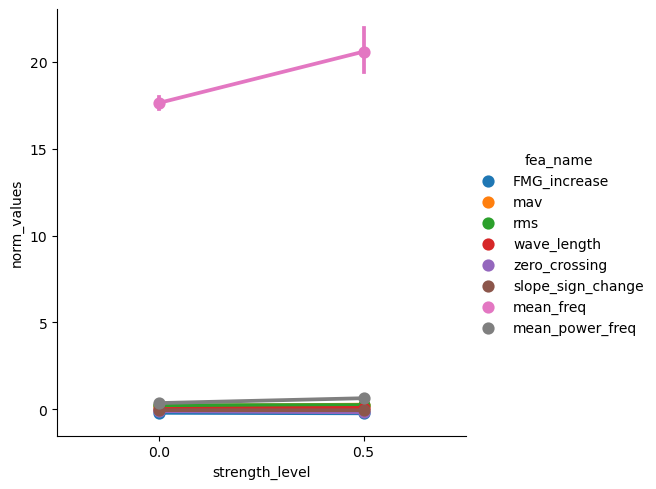

In [17]:
'''
归一化函数有问题
'''
# signal features normalization
sb_fea_norm_df = fea_df_norm(df2show, 'FMG_increase', 'mav', 'rms', 'wave_length', 'zero_crossing', 'slope_sign_change', 'mean_freq', 'mean_power_freq')

# show figure
show_df = pd.DataFrame(columns = ('subject', 'strength_level', 'norm_values', 'fea_name'))

for index, row in sb_fea_norm_df.iterrows():    # go through each row
    for i in ['FMG_increase', 'mav', 'rms', 'wave_length', 'zero_crossing', 'slope_sign_change', 'mean_freq', 'mean_power_freq']:
        show_df = pd.concat([show_df, pd.DataFrame({'subject': [row['subject_name']],
                                                    'strength_level': [row['label(kg)']],
                                                    'norm_values': [row[i]],
                                                    'fea_name': [i]})], axis = 0, ignore_index=True)

sns.catplot(x = "strength_level",
            y = "norm_values",
            hue = "fea_name",
            data = show_df,
            kind = 'point')

In [20]:
show_df

,subject,strength_level,norm_values,fea_name
0,w1s1_affected,0.0,-0.210991,FMG_increase
1,w1s1_affected,0.0,0.518007,mav
2,w1s1_affected,0.0,0.700529,rms
3,w1s1_affected,0.0,0.275674,wave_length
4,w1s1_affected,0.0,-0.149069,zero_crossing
...,...,...,...,...
155,w1s1_affected,0.5,-0.027936,wave_length
156,w1s1_affected,0.5,-0.251445,zero_crossing
157,w1s1_affected,0.5,-0.008723,slope_sign_change
158,w1s1_affected,0.5,23.142259,mean_freq


NameError: name 'all_feature_df' is not defined